# Analysis of weather effects on Citibike trips

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as datetime

## Read data
* trips
* weather

In [16]:
##loading the data frames into variables for usage

#2019
january_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201901-citibike-tripdata.csv", parse_dates=True)
february_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201902-citibike-tripdata.csv", parse_dates=True)
march_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201903-citibike-tripdata.csv", parse_dates=True)
april_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201904-citibike-tripdata.csv", parse_dates=True)
may_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201905-citibike-tripdata.csv", parse_dates=True)
june_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201906-citibike-tripdata.csv", parse_dates=True)
july_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201907-citibike-tripdata.csv", parse_dates=True)
august_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201908-citibike-tripdata.csv", parse_dates=True)
september_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201909-citibike-tripdata.csv", parse_dates=True)
october_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201910-citibike-tripdata.csv", parse_dates=True)
november_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201911-citibike-tripdata.csv", parse_dates=True)
december_19 = pd.read_csv("E:/test/citibike-main/data/citibike/201912-citibike-tripdata.csv", parse_dates=True)

#merging into a single dataframe
stacked =  pd.concat([january_19,february_19,march_19,april_19,may_19,june_19,july_19,august_19,september_19,october_19,november_19,december_19], axis = 0)
citibike_df = stacked.reset_index(drop = True)

In [17]:
#first 5 values
citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [18]:
#last 5 values
citibike_df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
20551692,93,2019-12-31 23:58:18.0160,2019-12-31 23:59:51.6360,3141.0,1 Ave & E 68 St,40.765005,-73.958185,3142.0,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2
20551693,786,2019-12-31 23:58:59.8960,2020-01-01 00:12:06.3460,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1
20551694,351,2019-12-31 23:59:03.6950,2020-01-01 00:04:54.8730,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368.0,5 Ave & 3 St,40.672815,-73.983524,27746,Subscriber,1935,2
20551695,1571,2019-12-31 23:59:21.3610,2020-01-01 00:25:32.9420,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1
20551696,310,2019-12-31 23:59:55.2960,2020-01-01 00:05:05.7270,3351.0,E 102 St & 1 Ave,40.786995,-73.941648,3379.0,E 103 St & Lexington Ave,40.790305,-73.947558,21013,Subscriber,1969,0


In [19]:
citibike_df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [20]:
%%time
citibike_df["starttime"] = pd.to_datetime(citibike_df["starttime"])
citibike_df["stoptime"] = pd.to_datetime(citibike_df["stoptime"])
citibike_df

CPU times: total: 38.8 s
Wall time: 38.7 s


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20551692,93,2019-12-31 23:58:18.016,2019-12-31 23:59:51.636,3141.0,1 Ave & E 68 St,40.765005,-73.958185,3142.0,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2
20551693,786,2019-12-31 23:58:59.896,2020-01-01 00:12:06.346,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1
20551694,351,2019-12-31 23:59:03.695,2020-01-01 00:04:54.873,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368.0,5 Ave & 3 St,40.672815,-73.983524,27746,Subscriber,1935,2
20551695,1571,2019-12-31 23:59:21.361,2020-01-01 00:25:32.942,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1


In [21]:
citibike_df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                  float64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                    float64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object

In [22]:
DATA_DIR = "../data/"
WEATHER_DIR = DATA_DIR + "weather/"

In [23]:
# read weather
weather = pd.read_csv(WEATHER_DIR + "GHCN-Daily-Cleaned.csv", index_col=0)
weather["DATE"] = pd.to_datetime(weather["DATE"])
weather.set_index(weather["DATE"])
weather

,DATE,PRCP,SNOW,SNWD,TAVG_F,Normal Fog,Heavy Fog,Ice Fog,Fog,Thunder,Haze,Rain
0,2013-01-01,0.0,0.0,0.0,33.0,0,0,0,0,0,0,0
1,2013-01-02,0.0,0.0,0.0,27.5,0,0,0,0,0,1,0
2,2013-01-03,0.0,0.0,0.0,28.0,0,0,0,0,0,0,0
3,2013-01-04,0.0,0.0,0.0,33.5,0,0,0,0,0,0,0
4,2013-01-05,0.0,0.0,0.0,37.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2022-03-16,0.0,0.0,0.0,57.5,0,0,0,0,0,0,0
3362,2022-03-17,2.0,0.0,0.0,49.0,1,1,0,1,0,1,0
3363,2022-03-18,0.0,0.0,0.0,62.0,1,0,0,1,0,1,0
3364,2022-03-19,1.3,0.0,0.0,59.4,1,0,0,1,0,1,0


## Weather EDA

In [24]:
citibike_df_per_day = (
    citibike_df.groupby(citibike_df["starttime"].dt.dayofyear)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "dayofyear", "tripduration": "counttrips"})
)
citibike_df_per_day

,dayofyear,counttrips
0,1,21962
1,2,37797
2,3,41676
3,4,43922
4,5,17432
...,...,...
360,361,31808
361,362,28520
362,363,17968
363,364,12138


In [25]:
start_2019 = pd.to_datetime("2019-01-01")
end_2019 = pd.to_datetime("2019-12-31")
weather_2019 = weather.loc[
    (weather["DATE"] >= start_2019) & (weather["DATE"] <= end_2019)
]

In [26]:
w_trips = pd.merge(
    weather_2019,
    citibike_df_per_day,
    left_on=weather_2019["DATE"].dt.dayofyear,
    right_on="dayofyear",
)
w_trips["Snowed on Day"] = w_trips["SNWD"].apply(lambda depth: depth > 0)
w_trips

,DATE,PRCP,SNOW,SNWD,TAVG_F,Normal Fog,Heavy Fog,Ice Fog,Fog,Thunder,Haze,Rain,dayofyear,counttrips,Snowed on Day
0,2019-01-01,1.5,0.0,0.0,48.5,1,0,0,1,0,0,0,1,21962,False
1,2019-01-02,0.0,0.0,0.0,37.5,0,0,0,0,0,0,0,2,37797,False
2,2019-01-03,0.0,0.0,0.0,40.6,0,0,0,0,0,0,0,3,41676,False
3,2019-01-04,0.0,0.0,0.0,41.0,0,0,0,0,0,0,0,4,43922,False
4,2019-01-05,12.7,0.0,0.0,44.0,1,0,0,1,0,0,0,5,17432,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,0.0,0.0,0.0,50.0,0,0,0,0,0,0,0,361,31808,False
361,2019-12-28,0.0,0.0,0.0,47.0,1,0,0,1,0,1,0,362,28520,False
362,2019-12-29,6.4,0.0,0.0,41.5,1,0,0,1,0,0,0,363,17968,False
363,2019-12-30,18.8,0.0,0.0,39.0,1,0,0,1,0,0,0,364,12138,False


# Check trip relationship with average temperature

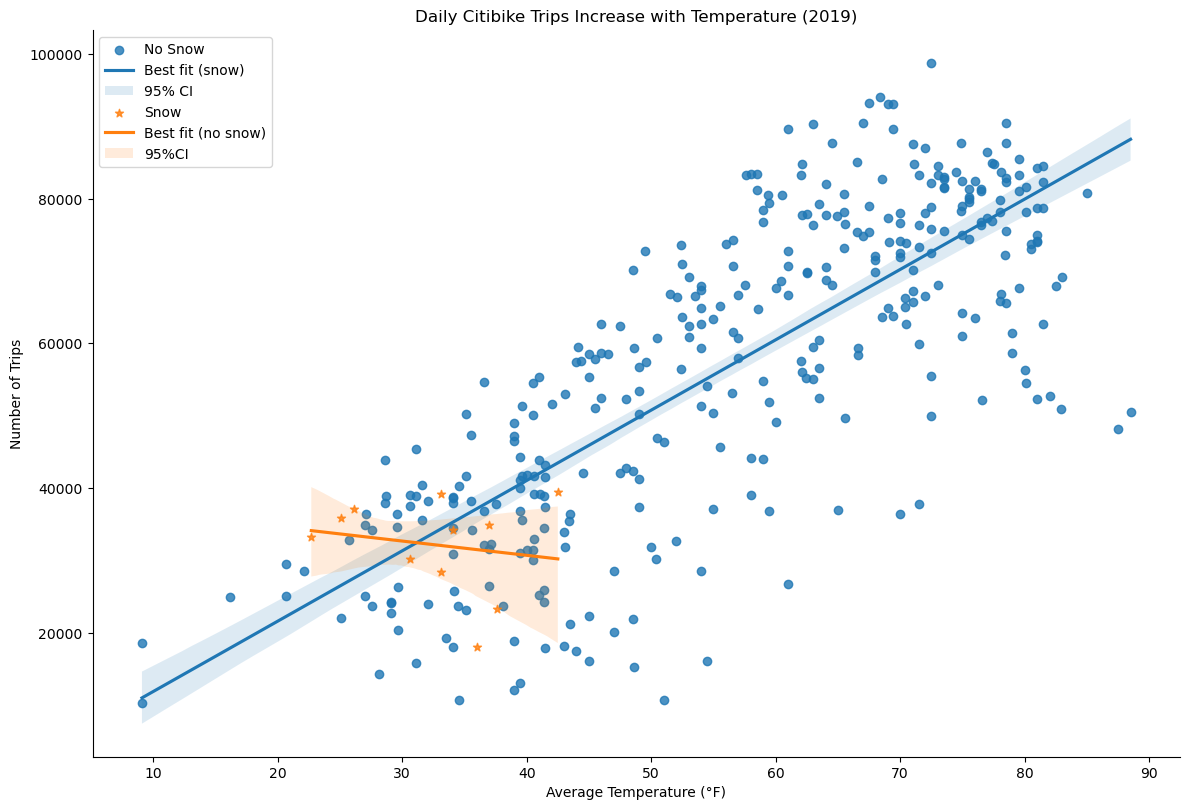

In [27]:
g = sns.lmplot(
    data=w_trips,
    x="TAVG_F",
    y="counttrips",
    hue="Snowed on Day",
    markers=["o", "*"],
    height=8,
    aspect=1.5,
    facet_kws={"legend_out": False},
)
plt.title("Daily Citibike Trips Increase with Temperature (2019)")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Number of Trips")
plt.legend(
    labels=[
        "No Snow",
        "Best fit (snow)",
        "95% CI",
        "Snow",
        "Best fit (no snow)",
        "95%CI",
    ]
)
plt.show()

# Check mean trips by weather condition

In [70]:
g = w_trips[["DATE", "PRCP", "SNOW", "Fog", "Thunder", "Haze"]]
g.PRCP = g.PRCP.apply(lambda x: 1 if x > 0 else 0)
g.SNOW = g.SNOW.apply(lambda x: 1 if x > 0 else 0)
g.DATE = g.DATE.dt.dayofyear
g = g.rename(columns={"DATE": "dayofyear"})
g = g.merge(citibike_df_per_day, how="left", on="dayofyear")
g

C:\Users\1830427131\AppData\Local\Temp\ipykernel_12268\4021858357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g.PRCP = g.PRCP.apply(lambda x: 1 if x > 0 else 0)
C:\Users\1830427131\AppData\Local\Temp\ipykernel_12268\4021858357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g.SNOW = g.SNOW.apply(lambda x: 1 if x > 0 else 0)
C:\Users\1830427131\AppData\Local\Temp\ipykernel_12268\4021858357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,dayofyear,PRCP,SNOW,Fog,Thunder,Haze,counttrips
0,1,1,0,1,0,0,21962
1,2,0,0,0,0,0,37797
2,3,0,0,0,0,0,41676
3,4,0,0,0,0,0,43922
4,5,1,0,1,0,0,17432
...,...,...,...,...,...,...,...
360,361,0,0,0,0,0,31808
361,362,0,0,1,0,1,28520
362,363,1,0,1,0,0,17968
363,364,1,0,1,0,0,12138


In [80]:
rain = (
    g.groupby("PRCP")["counttrips"]
    .mean()
    .reset_index()
    .rename(columns={"PRCP": "PRCP", "counttrips": "meantrips"})
)
rain.PRCP = rain.PRCP.apply(lambda x: "Rain" if x > 0 else "No Rain")

snow = (
    g.groupby("SNOW")["counttrips"]
    .mean()
    .reset_index()
    .rename(columns={"SNOW": "PRCP", "counttrips": "meantrips"})
)
snow.PRCP = snow.PRCP.apply(lambda x: "Snow" if x > 0 else "No Snow")

fog = (
    g.groupby("Fog")["counttrips"]
    .mean()
    .reset_index()
    .rename(columns={"Fog": "PRCP", "counttrips": "meantrips"})
)
fog.PRCP = fog.PRCP.apply(lambda x: "Fog" if x > 0 else "No Fog")

thunder = (
    g.groupby("Thunder")["counttrips"]
    .mean()
    .reset_index()
    .rename(columns={"Thunder": "PRCP", "counttrips": "meantrips"})
)
thunder.PRCP = thunder.PRCP.apply(lambda x: "Thunder" if x > 0 else "No Thunder")

haze = (
    g.groupby("Haze")["counttrips"]
    .mean()
    .reset_index()
    .rename(columns={"Haze": "PRCP", "counttrips": "meantrips"})
)
haze.PRCP = haze.PRCP.apply(lambda x: "Haze" if x > 0 else "No Haze")

In [81]:
g = pd.concat([rain, snow, fog, thunder, haze], axis=0)
g.meantrips = g.meantrips.round()
g

,PRCP,meantrips
0,No Rain,60336.0
1,Rain,50397.0
0,No Snow,57438.0
1,Snow,27917.0
0,No Fog,58960.0
1,Fog,52750.0
0,No Thunder,55688.0
1,Thunder,63208.0
0,No Haze,56102.0
1,Haze,57410.0


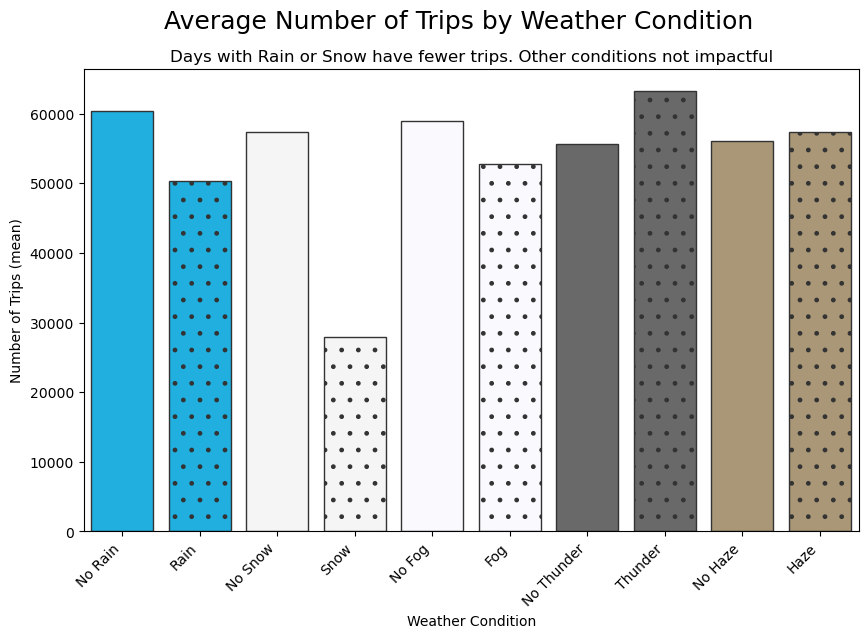

In [32]:
# plot mean trips by weather condition
fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
weather_colors = list(
    itertools.chain(
        *[
            [x, x]
            for x in ["deepskyblue", "whitesmoke", "ghostwhite", "dimgray", "xkcd:dust"]
        ]
    )
)
ax = sns.barplot(x=g.PRCP, y=g.meantrips, palette=weather_colors, edgecolor=".2", ax=ax)
for i, bar in enumerate(ax.patches):
    if i % 2 == 1:
        bar.set_hatch(".")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

plt.xlabel("Weather Condition")
plt.ylabel("Number of Trips (mean)")
plt.suptitle("Average Number of Trips by Weather Condition", fontsize=18)
plt.title("Days with Rain or Snow have fewer trips. Other conditions not impactful")
plt.show()

In [34]:
# fix bins later
bins = [0, 0.0001, 5, 20, 100]
w_trips["PRCP_bin"] = pd.cut(w_trips.PRCP, bins=bins, include_lowest=True)
w_trips.PRCP_bin.value_counts().sort_index()

(-0.001, 0.0001]    217
(0.0001, 5.0]        75
(5.0, 20.0]          50
(20.0, 100.0]        23
Name: PRCP_bin, dtype: int64

In [35]:
g = (
    w_trips.groupby("PRCP_bin")["counttrips"]
    .mean()
    .reset_index()
    .rename(columns={"PRCP_bin": "PRCP_bin", "counttrips": "meantrips"})
)
g

,PRCP_bin,meantrips
0,"(-0.001, 0.0001]",60336.230415
1,"(0.0001, 5.0]",59057.373333
2,"(5.0, 20.0]",42391.980000
3,"(20.0, 100.0]",39557.956522


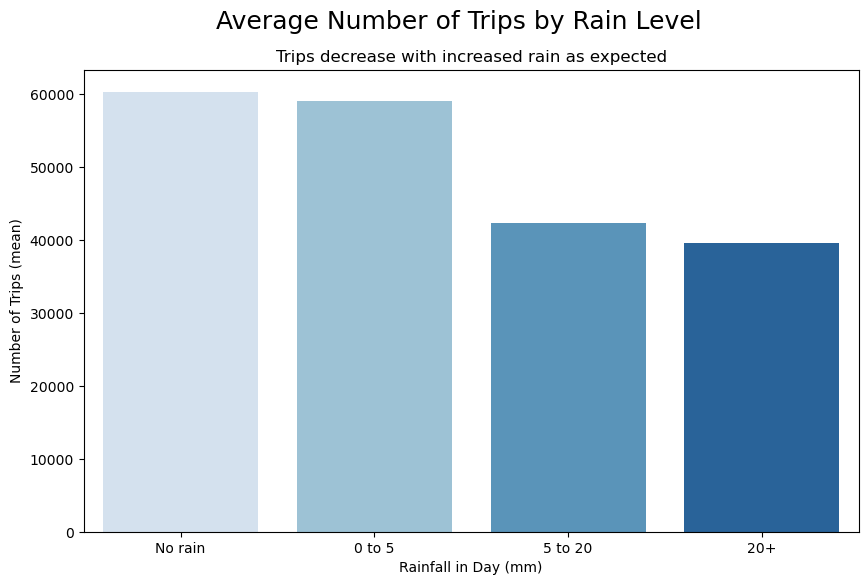

In [36]:
# plot mean trips by weather condition
fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
ax = sns.barplot(x=g.PRCP_bin, y=g.meantrips, palette="Blues", ax=ax)

ax.set_xticklabels(["No rain", "0 to 5", "5 to 20", "20+"])
plt.xlabel("Rainfall in Day (mm)")
plt.ylabel("Number of Trips (mean)")
plt.suptitle("Average Number of Trips by Rain Level", fontsize=18)
plt.title("Trips decrease with increased rain as expected")
plt.show()

In [38]:
trips_per_month = (
    citibike_df.groupby(citibike_df["starttime"].dt.month)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "month", "tripduration": "counttrips"})
)
trips_per_month

,month,counttrips
0,1,967287
1,2,943744
2,3,1327960
3,4,1766094
4,5,1924563
5,6,2125370
6,7,2181064
7,8,2344224
8,9,2444900
9,10,2092573


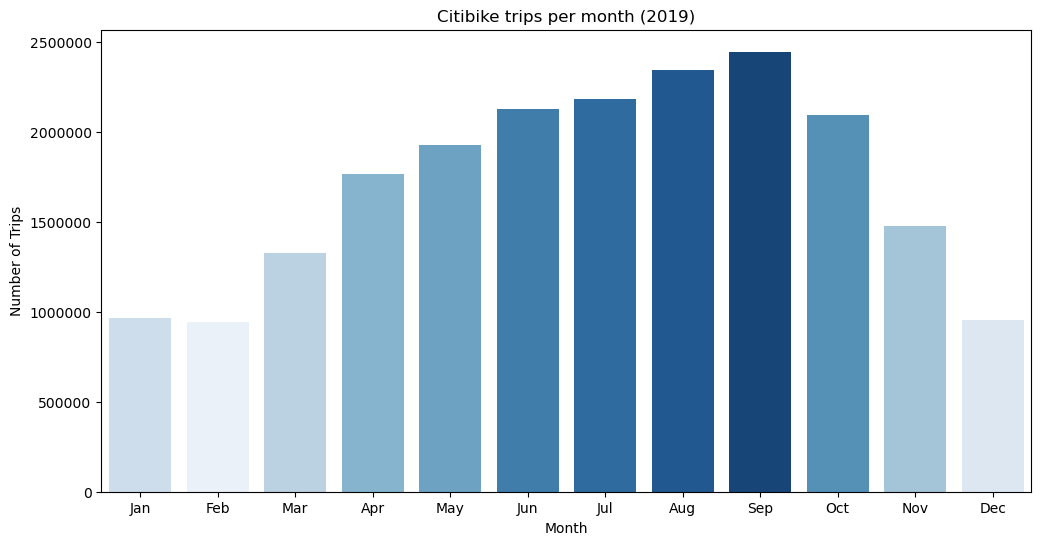

In [87]:
# Plot trips per month
import numpy as np 
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.barplot(
    data=trips_per_month,
    x="month",
    y="counttrips",
    palette=helpers.colors_from_values(trips_per_month.counttrips, "Blues"),
    ax=ax,
)
plt.title("Citibike trips per month (2019)")

# set month labels
plt.xlabel("Month")
monthlabels = [
    datetime.date(1900, month + 1, 1).strftime("%b") for month in trips_per_month.index
]
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(monthlabels)

plt.ylabel("Number of Trips")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

#### By day

In [43]:
# trips by which day of the week it is
trips_per_day_name = (
    citibike_df.groupby(citibike_df["starttime"].dt.day_name())["tripduration"]
    .count()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
    .reset_index()
    .rename(columns={"starttime": "day_name", "tripduration": "counttrips"})
)
trips_per_day_name

,day_name,counttrips
0,Monday,2922106
1,Tuesday,3157951
2,Wednesday,3146705
3,Thursday,3001240
4,Friday,3117824
5,Saturday,2815274
6,Sunday,2390597


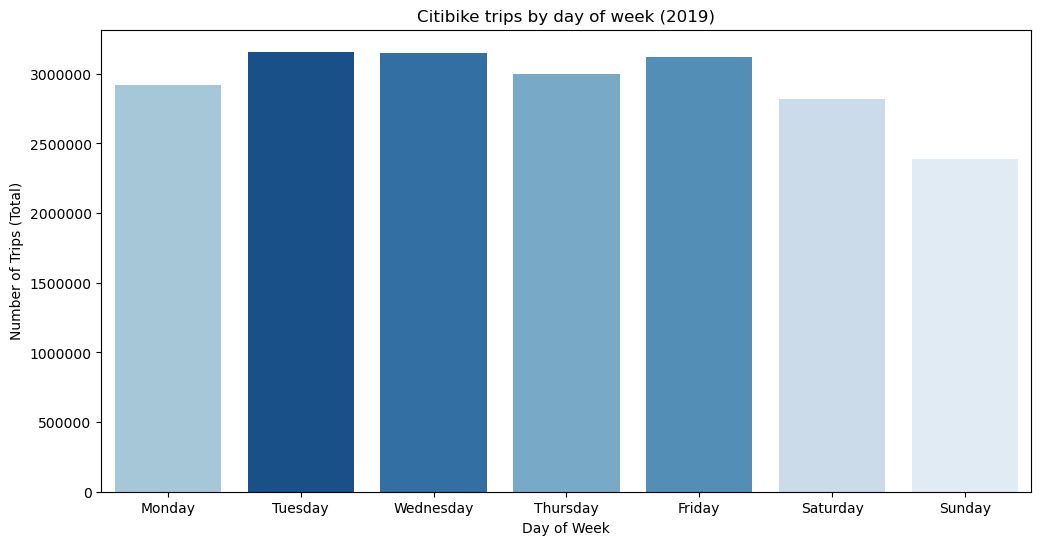

In [44]:
# Plot trips by day of week
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.barplot(
    data=trips_per_day_name,
    x="day_name",
    y="counttrips",
    palette=helpers.colors_from_values(trips_per_day_name.counttrips, "Blues"),
    ax=ax,
)
plt.title("Citibike trips by day of week (2019)")

plt.xlabel("Day of Week")
plt.ylabel("Number of Trips (Total)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

del trips_per_day_name

In [48]:
trips_per_day = (
    citibike_df.groupby(citibike_df["starttime"].dt.dayofyear)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "dayofyear", "tripduration": "counttrips"})
)
trips_per_day

,dayofyear,counttrips
0,1,21962
1,2,37797
2,3,41676
3,4,43922
4,5,17432
...,...,...
360,361,31808
361,362,28520
362,363,17968
363,364,12138


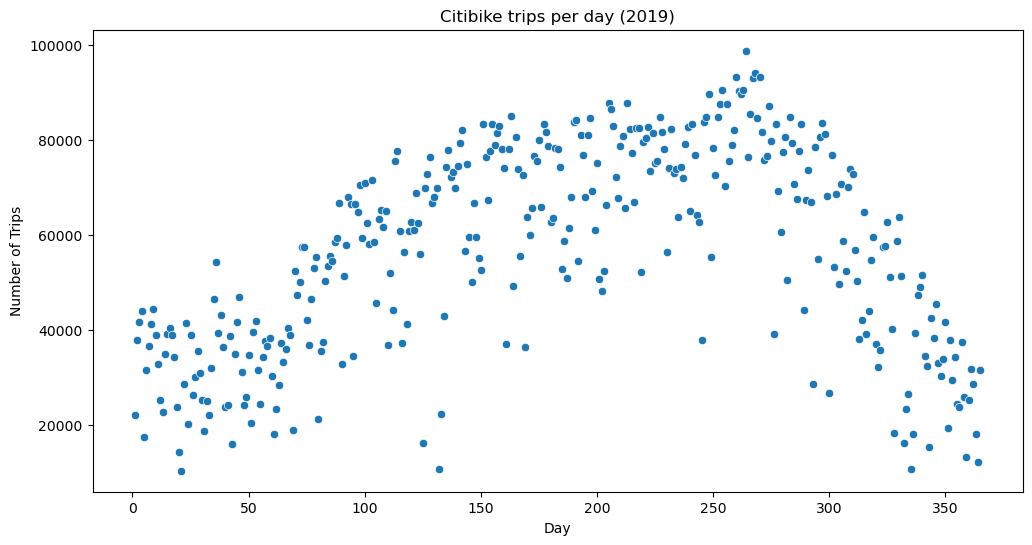

In [49]:
# Plot trips per day
plt.figure(figsize=(12, 6))
sns.scatterplot(data=trips_per_day, x="dayofyear", y="counttrips")
plt.title("Citibike trips per day (2019)")
plt.xlabel("Day")
plt.ylabel("Number of Trips")
# TODO set xticklabels to use ConciseDateFormatter
plt.show()


#### By hour

In [51]:
# trips by hour of day
trips_per_hour = (
    citibike_df.groupby(citibike_df["starttime"].dt.hour)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "hour", "tripduration": "counttrips"})
)
trips_per_hour

,hour,counttrips
0,0,185334
1,1,105233
2,2,64308
3,3,41559
4,4,44897
5,5,139887
6,6,443047
7,7,933379
8,8,1626764
9,9,1308178


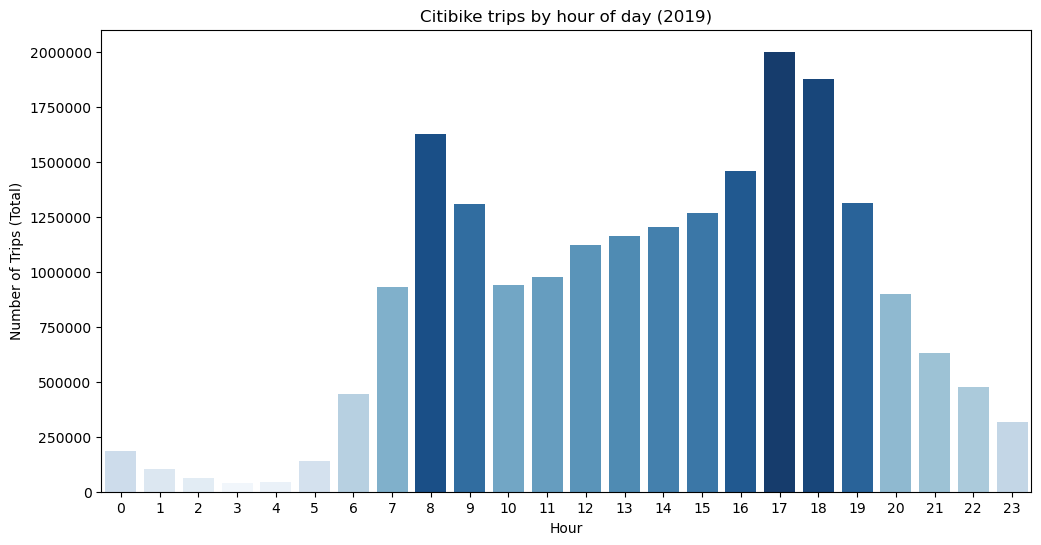

In [61]:
# Plot trips by hour of day
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.barplot(
    data=trips_per_hour,
    x="hour",
    y="counttrips",
    palette=helpers.colors_from_values(trips_per_hour.counttrips, "Blues"),
    ax=ax,
)
plt.title("Citibike trips by hour of day (2019)")

plt.xlabel("Hour")
plt.ylabel("Number of Trips (Total)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()